A Recurrent Neural Network (RNN) is a type of artificial neural network designed for handling sequential data. Unlike traditional feedforward neural networks, RNNs have memory, meaning they retain information about previous inputs and use it to influence future outputs.


How RNN works :
- Each neuron in an RNN has a feedback loop, allowing information from previous time steps to be retained.
- The network processes input sequentially, updating its internal state with each new piece of data.
- RNNs use hidden states to store context, making them effective for tasks involving sequences.



Benefits of using RNN in Stock prediction :
- Capturing Temporal Dependencies: Stock prices follow patterns influenced by past movements. RNNs can remember previous trends and use them to predict future prices.
- Sequential Data Handling: Unlike traditional models, RNNs process sequential data effectively, making them ideal for time-series forecasting.
- Adaptability to Market Patterns: RNNs can learn complex relationships between different market factors, such as volume, trends, and news impact.
- Automated Feature Extraction: Instead of manual feature engineering, RNNs can automatically identify relevant patterns and trends.
- Use with Advanced Variants: More powerful versions like LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) improve memory retention, helping with long-term dependencies.


Short-comings of using RNN in Stock prediction :
- Short-Term Memory Issues: Standard RNNs struggle with long sequences due to the vanishing gradient problem, making them less reliable for long-term predictions.
- Highly Sensitive to Noise: Market data is volatile, and RNNs can overfit to noise rather than identifying actual trends.
- Requires Large Dataset: To make accurate predictions, RNNs need large amounts of historical stock data, which may not always be available.
- Computationally Intensive: Training an RNN, especially with large datasets, can be slow and resource-heavy.
- Struggles with Sudden Market Shifts: Stock markets can be influenced by external factors like economic crises or breaking news, which are hard for RNNs to predict.


1. Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

2. Here we are fetching the historical stock data for Apple Inc using yfinance Library(5 years of stock data) and also preparing the data set for stock price prediction.
While chosing the feature, we have selected five key stock market attributes:

  - Open : Price at market open
  - High : Highest price reached during the day
  - Low : Lowest price during the day
  - Close : Price at market close
  - Volume : Number of shares traded

In [ ]:
ticker = 'AAPL'
df = yf.download(ticker, period = '5y')
df =df[['Open','High','Low','Close','Volume']]
df.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


3. Here we are applying MinMax scaling to our data set ensuring that all the feature values are normalized between 0 and 1.

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

4. Here we are creating sequence as it is an important step for preparing the data for models like LSTMs that rely on temporal dependencies because :
  - It helps in capturing the historical patterns.
  - It helps in structuring data for LSTM inputs.
  - It helps in preventing the data leakage.
  - Improving model performance.

In [ ]:
from datetime import time
def create_sequences(data, time_step=60):
    x, y = [], []
    for i in range(time_step, len(data)):
      x.append(data[i-time_step:i])
      y.append(data[i,3])
    return np.array(x), np.array(y)

time_step = 60
x,y = create_sequences(scaled_data, time_step)

5. Here we are spliting the Data into Train and test sets

In [ ]:
train_size = int(len(x)*0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

6. Here we initialize our model (LSTM) on our scaled stock market data.

In [ ]:
model= Sequential()
model.add(SimpleRNN(units=50, return_sequences=False, input_shape=(time_step, x.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 50)             │         2,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,851 (11.14 KB)

 Trainable params: 2,851 (11.14 KB)

 Non-trainable params: 0 (0.00 B)

7. Here we are Training the model

In [ ]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 32, validation_data = (x_test, y_test))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0345 - val_loss: 0.0368
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0037 - val_loss: 0.0297
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0019 - val_loss: 0.0182
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0014 - val_loss: 0.0150
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0011 - val_loss: 0.0148
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 9.4161e-04 - val_loss: 0.0091
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 7.7648e-04 - val_loss: 0.0071
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 7.4744e-04 - val_loss: 0.0076
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.5660e-04 - val_loss: 0.0049
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.0258e-04 - val_loss: 0.0044
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 6.5033e-04 - val_loss: 0.0036
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 

8. Here we make the predictions based on our split and the model after we did the min max scaling.

In [ ]:
y_pred = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


9. Here we reconstruct arrays for inverse scaling as it helps in restoring the predicted and actual values into their original structure as it will help us in preparing for inverse scaling.

Inverse Transform requires a full array with same shape as original data

Inverse scale the data is required because this model is trained on scaled data, and predictions need to be converted back to their original scale for meaningful interpretation.

In [ ]:
predicted_full = np.zeros((len(y_pred), scaled_data.shape[1]))
actual_full = np.zeros((len(y_test), scaled_data.shape[1]))

predicted_full[:, 3]= y_pred[:,0]
actual_full[:,3]= y_test

predicted_prices = scaler.inverse_transform(predicted_full)[:,3]
actual_prices = scaler.inverse_transform(actual_full)[:,3]

10. Here we are creating visual comparison between actual and predicted stock prices using matplotlib

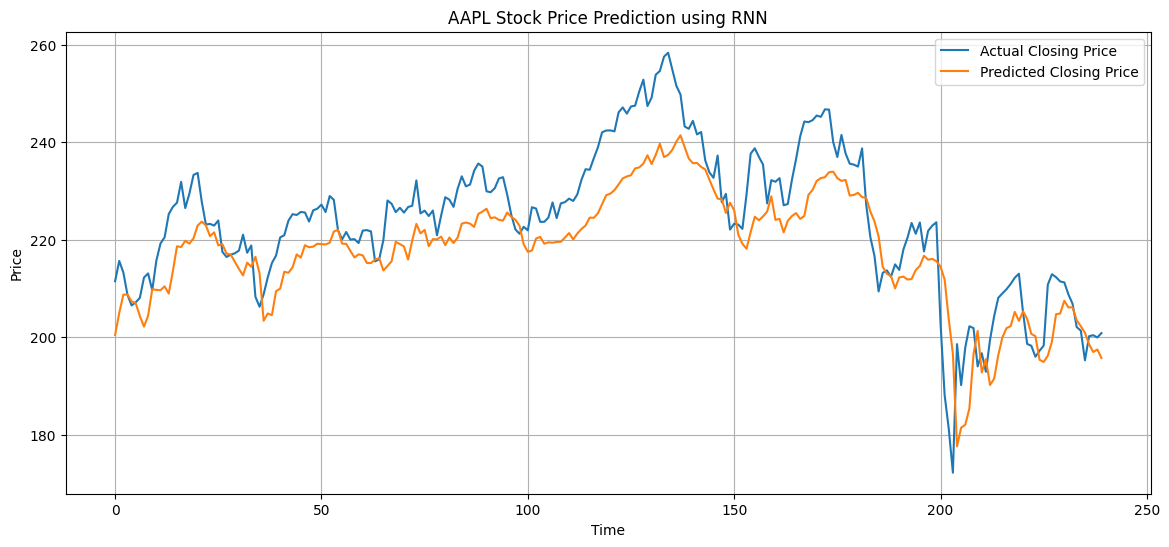

In [ ]:
plt.figure(figsize = (14,6))
plt.plot(actual_prices, label= 'Actual Closing Price')
plt.plot(predicted_prices, label = 'Predicted Closing Price')
plt.title(f'{ticker} Stock Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

11. Here we used different models to evaluate the model

In [ ]:
mse = mean_squared_error(actual_prices, predicted_prices)
mae = mean_absolute_error(actual_prices, predicted_prices)
r2 = r2_score(actual_prices, predicted_prices)
rmse = np.sqrt(mse)

print(f"Model Evaluation Metrics")
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2) Score: {r2:.4f}')

Model Evaluation Metrics
Mean Squared Error (MSE): 83.05
Mean Absolute Error (MAE): 7.66
Root Mean Squared Error (RMSE): 9.11
R-squared (R2) Score: 0.6175


### Conclusion

1. MAE = 83.05
  - Measures the average squared difference between predicted and actual values.
  - A lower MSE indicates better performance, but it's sensitive to outliers due to squaring errors.
  - Since it's in squared units, it's harder to interpret directly.

2. MSE = 7.66
  - The average of the absolute differences between predicted and actual values.
  - Easier to interpret than MSE—on average, predictions are off by ~7.66 units.

3. RMSE = 9.11
  - Square root of MSE; gives error in the same unit as the output variable.
  - Comparable to MAE, but more sensitive to larger errors.
  - Tells us predictions deviate from actual values by around 9.11 units.

Question : Why we have not used a simple percentage to check the accuracy of the model above ?

Answer : The reason is simple because unlike classification task where "Accuracy" is straight forward like (95%) or something like that, in Regression problems we usually don't talk about the accuracy in percentage as here we are talking about the continuous values (in this case it is the stock price) and not the classes.